# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

Використала ось цей датасет [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). Він завеликий для загрузки на гіт :(

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt


In [ ]:

data = pd.read_csv('creditcard.csv')
missing_values = data.isnull().sum()
print("Missing values ​​in columns:\n", missing_values[missing_values > 0])
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])
print(data.head())

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


iso_forest = IsolationForest(contamination=0.00172, random_state=42)
y_pred_iso_forest = iso_forest.fit_predict(X_train)
y_pred_iso_forest = np.where(y_pred_iso_forest == -1, 1, 0)

oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.00172)
y_pred_oc_svm = oc_svm.fit_predict(X_train)
y_pred_oc_svm = np.where(y_pred_oc_svm == -1, 1, 0)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.00172)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

from sklearn.metrics import classification_report, precision_recall_curve, auc



Missing values ​​in columns:
 Series([], dtype: int64)
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25  

In [1]:

def calculate_auprc(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

df = pd.read_csv('creditcard.csv')

scaler = StandardScaler()
X = df.drop(columns=['Class'])
y = df['Class']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isolation_forest.fit(X_train)
y_pred_test_if = isolation_forest.predict(X_test)
y_pred_test_if = [1 if x == -1 else 0 for x in y_pred_test_if]
auprc_if = calculate_auprc(y_test, y_pred_test_if)
print(f'Isolation Forest AUPRC: {auprc_if}')

ocsvm = OneClassSVM(nu=0.005, kernel='rbf', gamma='scale')
ocsvm.fit(X_train)
y_pred_test_svm = ocsvm.predict(X_test)
y_pred_test_svm = [1 if x == -1 else 0 for x in y_pred_test_svm]
auprc_svm = calculate_auprc(y_test, y_pred_test_svm)
print(f'One-Class SVM AUPRC: {auprc_svm}')

lof = LocalOutlierFactor(n_neighbors=20)
y_pred_test_lof = lof.fit_predict(X_test)
y_pred_test_lof = [1 if x == -1 else 0 for x in y_pred_test_lof]
auprc_lof = calculate_auprc(y_test, y_pred_test_lof)
print(f'Local Outlier Factor AUPRC: {auprc_lof}')


Isolation Forest AUPRC: 0.3430818895660685
One-Class SVM AUPRC: 0.24044644356645364
Local Outlier Factor AUPRC: 0.10112738116258375


Epoch [10/100], Loss: 1.0013
Epoch [20/100], Loss: 0.9944
Epoch [30/100], Loss: 0.9831
Epoch [40/100], Loss: 0.9651
Epoch [50/100], Loss: 0.9399
Epoch [60/100], Loss: 0.9091
Epoch [70/100], Loss: 0.8778
Epoch [80/100], Loss: 0.8468
Epoch [90/100], Loss: 0.8186
Epoch [100/100], Loss: 0.7896


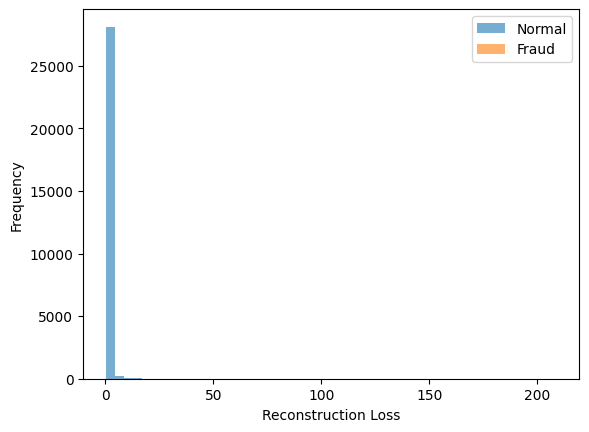

Threshold: 36.0219
Autoencoder Precision: 0.4483
Autoencoder Recall: 0.2826
Autoencoder F1-Score: 0.3467


In [9]:

df = pd.read_csv('creditcard.csv') 
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0005)

num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    outputs = autoencoder(X_train_torch)
    loss = criterion(outputs, X_train_torch)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_test_torch)
    loss_test = torch.mean((reconstructions - X_test_torch) ** 2, dim=1).numpy()

plt.hist(loss_test[y_test == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(loss_test[y_test == 1], bins=50, alpha=0.6, label='Fraud')
plt.xlabel('Reconstruction Loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()


precision, recall, thresholds = precision_recall_curve(y_test, loss_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Threshold: {best_threshold:.4f}')

y_pred_test_ae = (loss_test > best_threshold).astype(int)

precision_ae = precision_score(y_test, y_pred_test_ae)
recall_ae = recall_score(y_test, y_pred_test_ae)
f1_ae = f1_score(y_test, y_pred_test_ae)

print(f'Autoencoder Precision: {precision_ae:.4f}')
print(f'Autoencoder Recall: {recall_ae:.4f}')
print(f'Autoencoder F1-Score: {f1_ae:.4f}')


**Звіт і пояснення**
Результати моделювання виявлення шахрайства в показали, що Isolation Forest виявився найефективнішим методом з AUPRC 0.343. Це свідчить про його здатність успішно ідентифікувати рідкісні аномалії, які характерні для шахрайських транзакцій. Isolation Forest працює шляхом випадкового вибору підмножин даних та формування дерев рішень, що дозволяє йому оцінювати глибину спостережень. Чим глибше дані, тим більш вірогідно, що це аномалія. Ця особливість робить його надзвичайно корисним для роботи з великими наборами даних, в яких аномалії складають малий відсоток.

Автоенкодер, хоча й показав кращу точність (Precision = 0.4483) та F1-оцінку (0.3467), не зміг досягти такої ж AUPRC, як Isolation Forest. Це може свідчити про те, що автоенкодер виявився чутливим до шуму в даних, а також до неправильної налаштування гіперпараметрів. Він працює шляхом навчання на нормальних даних і виявлення аномалій через великі відхилення від відтворених входів. Хоча автоенкодери можуть бути дуже потужними, їх ефективність сильно залежить від архітектури, кількості навчальних епох та налаштувань.
 
 
One-Class SVM, на жаль, не продемонстрував хороших результатів, з AUPRC 0.240. Цей метод вимагає уважного налаштування параметрів і може бути дуже чутливим до розподілу даних. Відтак, якщо дані не збалансовані або містять багато шуму, його ефективність може значно знизитися.
Аналізуючи результати, можна зробити висновок, що Isolation Forest є найбільш адаптованим методом для цієї задачі. Він продемонстрував високу чутливість до аномалій і здатність зберігати стабільність в умовах рідкісних подій. Автоенкодери, хоча і мають потенціал, потребують більш ретельного налаштування та тестування, щоб досягти кращих результатів.
В цілому, використання глибоких нейронних мереж, таких як автоенкодери, для виявлення аномалій є перспективним напрямком, але вимагає належної уваги до їх архітектури та параметрів. Комбінація різних методів може призвести до значного покращення виявлення шахрайства, оскільки різні моделі можуть доповнювати одна одну, заповнюючи прогалини у виявленні аномалій.